In [26]:
from aes_stream import AES_ECB, AES_CBC, AES_CFB, AES_OFB, AES_CTR
from rc4 import RC4
from salsa20 import Salsa20
import numpy as np
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tabulate import tabulate

sns.set(style="darkgrid")

In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
def test_time(Algo, n_bytes_key, n_bytes_stream):
    key = np.random.randint(0, 256, n_bytes_key, dtype=np.uint8)
    stream = np.random.randint(0, 256, n_bytes_stream, dtype=np.uint8)
    
    start = time.time()
    cipher = Algo(key)
    assert np.array_equal(stream, cipher.encrypt(cipher.decrypt(stream))), str(Algo) + " works bad!"
    
    return time.time() - start

In [44]:
test_time(RC4, 256, 512)

0.016104698181152344

In [45]:
test_time(Salsa20, 32, 512)

0.0631566047668457

In [46]:
test_time(AES_ECB, 16, 512)

0.8633129596710205

In [47]:
test_time(AES_CBC, 16, 512)

0.8941779136657715

In [48]:
test_time(AES_CFB, 16, 512)

3.483200788497925

In [49]:
test_time(AES_OFB, 16, 512)

0.8972077369689941

In [50]:
test_time(AES_CTR, 16, 512)

0.9174067974090576

In [11]:
data = {"RC4": [], "Salsa20": [], "AES_ECB": [], "AES_CBC": [], "AES_CFB": [], "AES_OFB": [], "AES_CTR": []}
points = 10
init_power = 9
power_bytes = init_power
upper_bound = 60
rc4_s = salsa20_s = ecb_s = cbc_s = cfb_s = ofb_s = ctr_s = 0
for i in range(points):
    print(i)
    n_bytes = 2**power_bytes
    
    if rc4_s < upper_bound:
        rc4_s = test_time(RC4, 256, n_bytes)

    if salsa20_s < upper_bound:
        salsa20_s = test_time(Salsa20, 32, n_bytes)
    
    if ecb_s < upper_bound:
        ecb_s = test_time(AES_ECB, 16, n_bytes)
        
    if cbc_s < upper_bound:
        cbc_s = test_time(AES_CBC, 16, n_bytes)
        
    if cfb_s < upper_bound:
        cfb_s = test_time(AES_CFB, 16, n_bytes)
        
    if ofb_s < upper_bound:
        ofb_s = test_time(AES_OFB, 16, n_bytes)
    
    if ctr_s < upper_bound:
        ctr_s = test_time(AES_CTR, 16, n_bytes)
    
    data["RC4"].append(rc4_s)
    data["Salsa20"].append(salsa20_s)
    data["AES_ECB"].append(ecb_s)
    data["AES_CBC"].append(cbc_s)
    data["AES_CFB"].append(cfb_s)
    data["AES_OFB"].append(ofb_s)
    data["AES_CTR"].append(ctr_s)
    
    power_bytes += 1

0
1
2
3
4
5
6
7
8
9


In [12]:
plt.tight_layout()
plt.rcParams["figure.figsize"] = (13,10)

<Figure size 432x288 with 0 Axes>

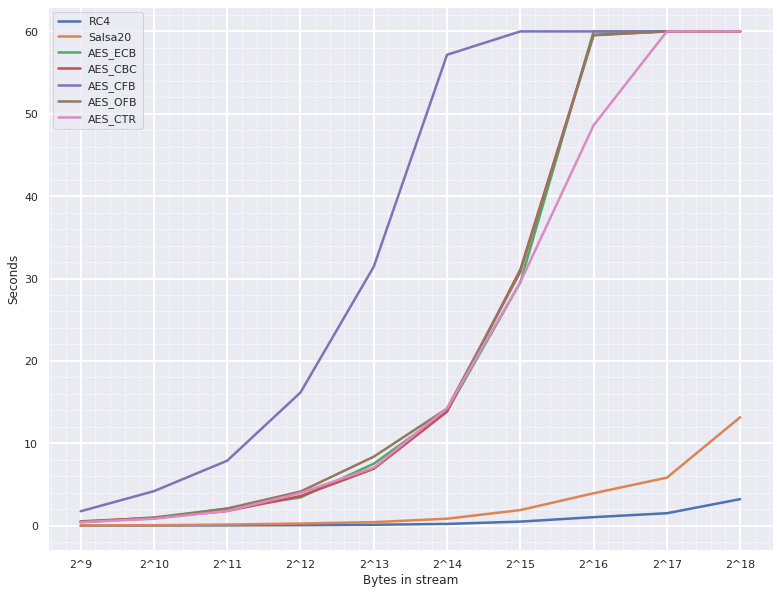

In [34]:
for k in data:
    if k == "Data":
        continue
    y = np.array(data[k])
    y[y > 60] = 60
    x = list(range(len(y)))
    
    ax = sns.lineplot(x=x, y=y, linewidth=2.5, label=k)

plt.xticks(range(points))
ax.set_xticklabels([f"2^{i}" for i in range(init_power, init_power + points)])
ax.set(ylabel="Seconds", xlabel="Bytes in stream")
ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=2.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

In [14]:
data

{'RC4': [0.009407758712768555,
  0.015240669250488281,
  0.035698652267456055,
  0.0616297721862793,
  0.10802626609802246,
  0.21257281303405762,
  0.4942448139190674,
  1.0324435234069824,
  1.509552001953125,
  3.2188451290130615],
 'Salsa20': [0.03280210494995117,
  0.05182147026062012,
  0.1373143196105957,
  0.25975561141967773,
  0.4260523319244385,
  0.846127986907959,
  1.892671823501587,
  3.9350180625915527,
  5.825977563858032,
  13.159297704696655],
 'AES_ECB': [0.41866517066955566,
  0.9931120872497559,
  2.0672190189361572,
  3.4304404258728027,
  7.522669315338135,
  13.913587808609009,
  29.519684314727783,
  65.52871227264404,
  65.52871227264404,
  65.52871227264404],
 'AES_CBC': [0.5253770351409912,
  0.9449450969696045,
  1.7839572429656982,
  3.590224027633667,
  6.903351545333862,
  13.841313362121582,
  31.071752309799194,
  59.581583738327026,
  100.32600092887878,
  100.32600092887878],
 'AES_CFB': [1.748281478881836,
  4.189073324203491,
  7.888752222061157,


In [15]:
data["Data"] = [f"2^{i} bytes" for i in range(init_power, init_power + points)]

In [17]:
content = np.array(list(data.values())).T
headers = list(data.keys())

In [22]:
print(tabulate(content, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤════════════╕
│    RC4 │   Salsa20 │   AES_ECB │   AES_CBC │   AES_CFB │   AES_OFB │   AES_CTR │ Data       │
╞════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╡
│ 0.0094 │    0.0328 │    0.4187 │    0.5254 │    1.7483 │    0.4780 │    0.4188 │ 2^9 bytes  │
├────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────────┤
│ 0.0152 │    0.0518 │    0.9931 │    0.9449 │    4.1891 │    0.8848 │    0.8421 │ 2^10 bytes │
├────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────────┤
│ 0.0357 │    0.1373 │    2.0672 │    1.7840 │    7.8888 │    2.0811 │    1.7851 │ 2^11 bytes │
├────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼────────────┤
│ 0.0616 │    0.2598 │    3.4304 │    3.5902 │   16.1675 │    4.1394 │    3.9617 │ 2^12 bytes │
├────────┼───────────┼───────────┼──────